In [1]:
#                                                  Simple Linear Regression (From Scratch)

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('used datasets/placement_toy.csv') # toy dataset

In [31]:
print(df)
print(df.isnull().sum())

     cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]
cgpa       0
package    0
dtype: int64


In [5]:
x = df.iloc[:, 0].values # 1D numpy array
y = df.iloc[:, 1].values

In [6]:
x # cgpa

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [7]:
y # package

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, random_state=42)

In [10]:
x_train # cgpa for training

array([7.18, 7.21, 8.62, 6.53, 5.12, 6.93, 7.15, 7.48, 4.85, 7.61, 5.84,
       6.75, 7.89, 5.91, 7.12, 8.44, 7.91, 7.69, 6.93, 7.11, 9.31, 5.98,
       8.1 , 8.94, 6.87, 7.39, 5.95, 8.11, 7.11, 5.64, 9.26, 6.78, 5.53,
       6.89, 7.4 , 6.94, 8.31, 7.19, 7.95, 5.42, 7.82, 8.99, 6.07, 6.26,
       7.28, 4.79, 7.3 , 5.99, 6.19, 5.48, 6.14, 6.76, 6.71, 6.35, 6.61,
       7.89, 8.71, 6.73, 5.42, 5.23, 6.94, 6.96, 6.93, 5.84, 7.77, 6.17,
       5.32, 6.34, 8.58, 6.07, 8.6 , 6.89, 7.63, 7.94, 5.79, 5.1 , 7.36,
       5.09, 8.93, 5.94, 9.38, 7.76, 6.98, 7.38, 7.28, 6.19, 7.88, 5.66,
       6.1 , 7.43, 8.65, 5.84, 5.83, 7.08, 7.66, 7.91, 7.42, 6.66, 6.47,
       6.05, 6.19, 8.15, 6.31, 8.87, 7.63, 7.34, 6.75, 8.18, 6.22, 8.44,
       6.29, 8.22, 6.42, 6.09, 6.93, 7.56, 8.01, 6.37, 5.38, 7.78, 7.04,
       7.2 , 8.13, 7.28, 9.16, 6.86, 6.33, 9.58, 5.89, 6.92, 8.63, 4.73,
       6.85, 6.6 , 7.13, 8.25, 7.29, 5.9 , 6.47, 4.57, 5.12, 8.37, 8.28,
       6.68, 6.12, 7.05, 6.61, 9.04, 8.09, 6.85, 6.

In [11]:
y_train # package

array([3.  , 3.24, 4.36, 2.71, 2.01, 2.46, 3.49, 2.83, 1.54, 2.77, 1.87,
       2.56, 2.99, 2.6 , 2.99, 4.03, 3.15, 3.83, 2.51, 2.61, 4.37, 2.84,
       3.89, 3.65, 2.87, 2.65, 2.54, 4.06, 2.66, 2.1 , 3.79, 3.11, 2.55,
       2.7 , 2.88, 2.37, 3.42, 2.4 , 4.14, 2.25, 3.25, 4.6 , 2.26, 2.44,
       3.48, 1.48, 3.33, 2.84, 2.69, 1.61, 2.3 , 3.18, 3.52, 2.73, 2.6 ,
       3.67, 4.08, 2.6 , 2.16, 1.73, 3.57, 3.08, 3.04, 2.18, 4.06, 2.42,
       1.86, 2.09, 4.1 , 2.46, 3.98, 3.26, 3.96, 3.99, 2.35, 2.3 , 2.92,
       1.86, 3.91, 2.24, 4.02, 3.54, 3.09, 3.13, 3.65, 2.48, 3.14, 2.21,
       2.2 , 3.33, 3.52, 3.26, 2.42, 2.85, 2.76, 3.89, 3.67, 2.82, 2.61,
       2.58, 2.72, 3.63, 3.18, 4.62, 3.44, 3.42, 2.48, 3.76, 2.14, 3.49,
       3.23, 3.89, 2.72, 2.31, 2.89, 3.31, 3.76, 2.01, 2.09, 3.62, 3.5 ,
       2.83, 3.6 , 2.72, 4.25, 3.09, 2.59, 4.43, 2.57, 3.09, 4.09, 1.48,
       2.93, 1.94, 2.93, 3.75, 3.12, 2.43, 2.7 , 1.94, 1.98, 4.11, 3.67,
       2.49, 2.76, 3.  , 3.24, 3.33, 3.55, 3.44, 3.

In [13]:
#                                                       Function to calculate parameters (m and b)
class SimpleLinearRegression(object):
    def __init__ (self):
        self.m=None
        self.b=None

    def training(self, x_train, y_train):
        """Model Training means calculating values of m and b for best fit line through sort of linear data"""
        x_mean = x_train.mean()
        y_mean= y_train.mean()
        num = 0
        deno = 0
        for i in range (x_train.shape[0]):
            num = num +(x_train[i]-x_mean) * (y_train[i]-y_mean)
            deno = deno + (x_train[i]-x_mean)*(x_train[i]-x_mean)
        self.m = num / deno
        self.b = y_mean - self.m * x_mean
        
    def predict(self, cgpa):
        return self.m*cgpa + self.b

In [14]:
obj=SimpleLinearRegression() # __init__ method is called 

In [15]:
obj.training(x_train, y_train)  # training method is called & m and b are computed 

In [16]:
print(f'm={obj.m}, b= {obj.b}')

m=0.5742564727019197, b= -1.0270069374542108


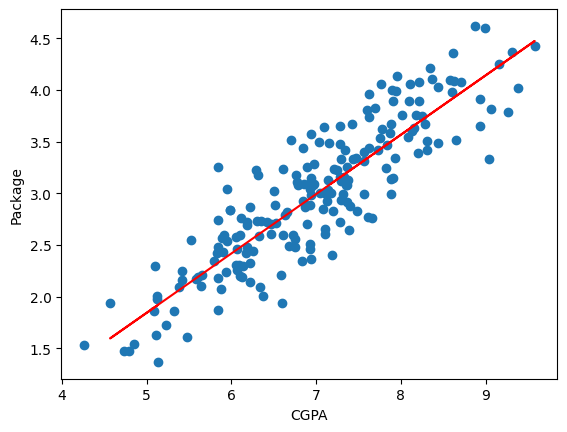

In [72]:
plt.scatter (df['cgpa'], df['package'])
plt.plot (X_train, obj.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [17]:
df.tail(5)

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


In [18]:
obj.predict(6.93)

2.9525904183700926

In [19]:
obj.predict(5.89)

2.355363686760096

In [20]:
obj.predict(7.21)

3.11338223072663

In [21]:
obj.predict(7.63)

3.3545699492614367

In [22]:
obj.predict(6.22)

2.5448683227517295

In [23]:
#                                      Implementing Simple Linear Regression using scikit-learn

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('used datasets/placement_toy.csv')

In [49]:
x=df.iloc[:, 0] # 1D numpy array of CGPA
y=df.iloc[:, 1] # 1D numpy array of Package

In [50]:
print(x,y)

0      6.89
1      5.12
2      7.82
3      7.42
4      6.94
       ... 
195    6.93
196    5.89
197    7.21
198    7.63
199    6.22
Name: cgpa, Length: 200, dtype: float64 0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [52]:
X_train

79     7.18
197    7.21
38     8.62
24     6.53
122    5.12
       ... 
106    6.13
14     7.73
92     7.90
179    7.14
102    5.13
Name: cgpa, Length: 160, dtype: float64

In [53]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [54]:
X_train

array([[7.18],
       [7.21],
       [8.62],
       [6.53],
       [5.12],
       [6.93],
       [7.15],
       [7.48],
       [4.85],
       [7.61],
       [5.84],
       [6.75],
       [7.89],
       [5.91],
       [7.12],
       [8.44],
       [7.91],
       [7.69],
       [6.93],
       [7.11],
       [9.31],
       [5.98],
       [8.1 ],
       [8.94],
       [6.87],
       [7.39],
       [5.95],
       [8.11],
       [7.11],
       [5.64],
       [9.26],
       [6.78],
       [5.53],
       [6.89],
       [7.4 ],
       [6.94],
       [8.31],
       [7.19],
       [7.95],
       [5.42],
       [7.82],
       [8.99],
       [6.07],
       [6.26],
       [7.28],
       [4.79],
       [7.3 ],
       [5.99],
       [6.19],
       [5.48],
       [6.14],
       [6.76],
       [6.71],
       [6.35],
       [6.61],
       [7.89],
       [8.71],
       [6.73],
       [5.42],
       [5.23],
       [6.94],
       [6.96],
       [6.93],
       [5.84],
       [7.77],
       [6.17],
       [5.

In [55]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [56]:
model.fit(X_train, y_train) # LinearRegression model expects input feature to be 2D array or matrix but target variable to be 1D array

LinearRegression()

In [58]:
model.coef_

array([0.57425647])

In [60]:
model.intercept_

-1.0270069374542108

In [61]:
y_pred = model.predict(X_test)

In [77]:
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])